## 1. Data preprocessing

### 1.1 Import libraries


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

### 1.2 Importing the cleaned data

In [105]:
df=pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv',sep=",")
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [106]:
# independent and dependent features for regression problem
X=df.drop('FWI',axis=1)
y=df['FWI']

### 1.3 Search for correlated features and removing them

In [107]:
correlation=X.corr()
correlation

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.586639
Classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.585658,0.511123,0.735197,0.586639,1.000000


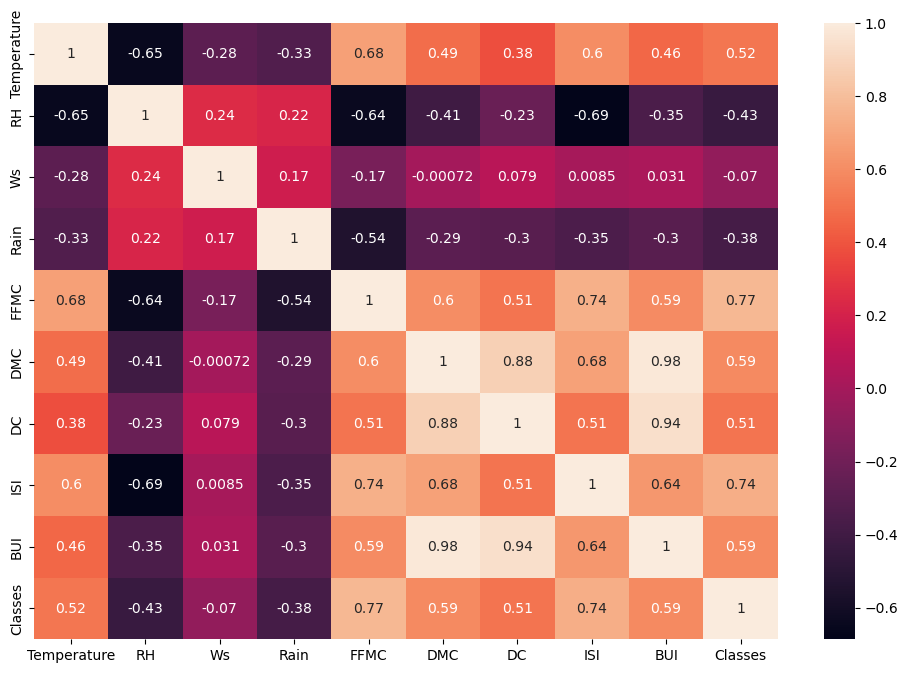

In [108]:
#Using peason correlation
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True)
plt.show()

In [109]:
correlation.index[2]

'Ws'

In [110]:
def corr_fn(dataset,threshold):
    col_corr=set()
    row_corr=set()
    correlation_matrix=dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j])>threshold:
                column_name=correlation_matrix.columns[j]
                row_name=correlation_matrix.index[i]
                col_corr.add(column_name)
                row_corr.add(row_name)
    return col_corr,row_corr

In [111]:
(col_corr,row_corr)=corr_fn(X,0.95)
print('Correlated features are',col_corr,'and',row_corr)

Correlated features are {'DMC'} and {'BUI'}


In [112]:
# Dropping the features with high correlation
X.drop(col_corr,axis=1,inplace=True)


### 1.3 Test-train split

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### 1.4 Standard Scaler

In [114]:
def Standard_scaler(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    return X_train_scaled,X_test_scaled

In [115]:
X_train_scaled,X_test_scaled=Standard_scaler(X_train,X_test)

/tmp/ipykernel_69613/309616647.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after standardization')

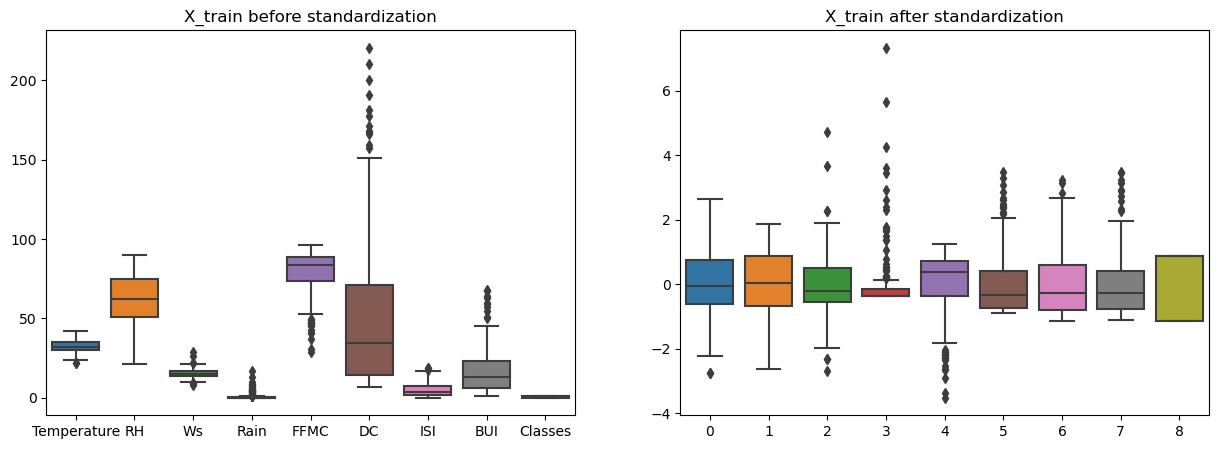

In [116]:
# Visualization the effect of standardization
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before standardization')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after standardization')

## 2. Model building 

### 2.1 Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_train_scaled,y_train)
linear_pred=linear_reg.predict(X_test_scaled)

from sklearn.metrics import r2_score
linear_r2=r2_score(linear_pred,y_test)
print('Linear Regression \nr2 score is',linear_r2)

Linear Regression 
r2 score is 0.9767304218548664


### 2.2 Ridge Regression

In [118]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
ridge_pred=ridge.predict(X_test_scaled)

ridge_r2=r2_score(ridge_pred,y_test)
print('Ridge Regression \nr2 score is',ridge_r2)

Ridge Regression 
r2 score is 0.9757080275512798


### 3.3 Lasso Regression

In [119]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
lasso_pred=lasso.predict(X_test_scaled)

lasso_r2=r2_score(lasso_pred,y_test)
print('Lasso Regression \nr2 score is',lasso_r2)

Lasso Regression 
r2 score is 0.9248360076467518


### 3.4 k-nearest neighbours

In [120]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train_scaled,y_train)
knn_pred=knn.predict(X_test_scaled)

knn_r2=r2_score(knn_pred,y_test)
print('KNN \nr2 score is',knn_r2)

KNN 
r2 score is 0.9198831639820403


### 3.5 Support vector regressor

In [121]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train_scaled,y_train)
svr_pred=svr.predict(X_test_scaled)

svr_r2=r2_score(svr_pred,y_test)
print('Support vector regressor \nr2 score is',svr_r2)

Support vector regressor 
r2 score is 0.9062172586306708


### 3.6 Random forest

In [122]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(X_train_scaled,y_train)
rf_reg_pred=rf_reg.predict(X_test_scaled)

rf_reg_r2=r2_score(rf_reg_pred,y_test)
print('Random Forest Regressor \nr2 score is',rf_reg_r2)

Random Forest Regressor 
r2 score is 0.9872592838026903


In [123]:
from tabulate import tabulate

r2_all = [["Linear regressor", linear_r2],
    ["Ridge", ridge_r2],
    ["Lasso", lasso_r2],
    ["k-nearest neigbours", knn_r2],
        ["Support vector", svr_r2],
        ["Random forest", rf_reg_r2]]

# Print tabular representation
print(tabulate(r2_all, headers=["Model", "R2 score"]))

Model                  R2 score
-------------------  ----------
Linear regressor       0.97673
Ridge                  0.975708
Lasso                  0.924836
k-nearest neigbours    0.919883
Support vector         0.906217
Random forest          0.987259


### 3.7 Hyperparameter tuning

### 3.7.1 Random Forest tuning

In [124]:
from sklearn.model_selection import GridSearchCV
params={'max_depth':[5,6,7,8,9,10],'min_samples_split':[2,3,4,5]}
rf_tune=GridSearchCV(rf_reg,params,cv=5)
rf_tune.fit(X_train,y_train)
rf_tune_pred=rf_tune.predict(X_test)
performance_rf_tune=r2_score(y_test,rf_tune_pred)

In [125]:
performance_rf_tune

0.9856977768622143

### 3.8 Saving the best model as .pkl file

In [126]:
import pickle
pickle.dump(rf_reg,open('regressionmodel.pkl','wb'))